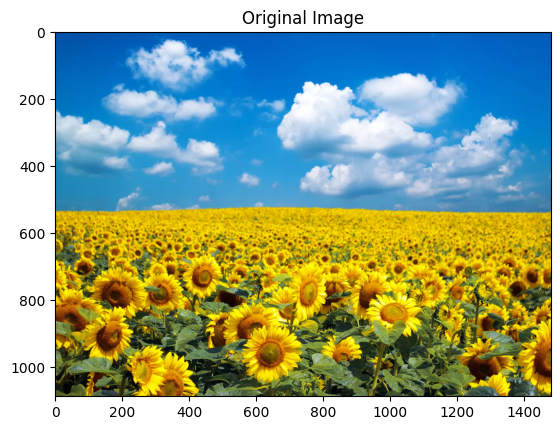

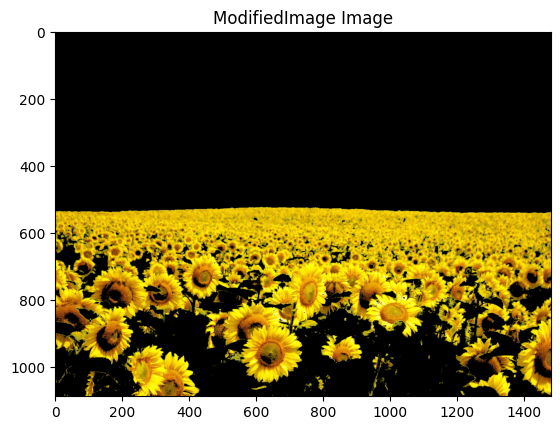

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = '../Input.png'  # Replace with the path to your face image
original_image = cv2.imread(image_path)

img1=cv2.imread('../Input.png',1)
img2=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.title("Original Image")
plt.imshow(img2)
plt.show()


# Step 2: Create a histogram of the whole image
hist_original = cv2.calcHist([original_image], [0], None, [255], [0, 255])

# Step 3: Modify image to fill the complete tonal range (adjust brightness and contrast)
def modify_contrast_brightness(image, alpha, beta):
    modified_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return modified_image

alpha = 1  # Adjust the contrast factor
beta = 5   # Adjust the brightness factor
modified_image = modify_contrast_brightness(original_image, alpha, beta)

# Step 4: Create a mask of your face (You will need to manually create or obtain this mask)
face_mask = cv2.imread('../Input.png', cv2.IMREAD_GRAYSCALE)

# Step 5: Use the mask to create an HSV histogram
hsv_image = cv2.cvtColor(modified_image, cv2.COLOR_BGR2HSV)
hist_hsv = cv2.calcHist([hsv_image], [0, 1], face_mask, [180, 256], [0, 180, 0, 256])

# Step 6: Analyze the HSV histogram for skin tone ranges (You can determine these ranges manually)

# Define lower and upper bounds for skin tone in HSV
lower_skin = np.array([0, 50, 100], dtype=np.uint8)
upper_skin = np.array([30, 255, 255], dtype=np.uint8)

# Step 7: Create a mask of skin tones using inRange
skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

# Step 8: Apply the skin tone mask to segment out your skin/face
skin_segmented_image = cv2.bitwise_and(modified_image, modified_image, mask=skin_mask)

# # Step 9: Display the results
plt.imshow(cv2.cvtColor(skin_segmented_image, cv2.COLOR_BGR2RGB)), plt.title('ModifiedImage Image')

plt.show()